In [5]:
import pandas as pd
from food.psql import *
from food.tools import *

In [6]:
table = 'food'

In [7]:
df = pd.read_sql(f'select * from {table}.dishes',engine).set_index('timestamp')
total_unique_users = len(df.drop_duplicates('user_id')['food_id']);total_unique_users

72

In [9]:
df

,timestamp,id,food_id,description,category,energy,protein,carb,fat,score,image_url,user_id,grams,measure_selected,min_timestamp,max_timestamp
0,2022-04-05 12:13:12.393507+00:00,1,1100300,"Egg omelet or scrambled egg, with cheese, meat...",Eggs and omelets,207.900,13.366500,1.480500,16.2960,0.267523,https://api.telegram.org/file/bot5091011572:AA...,78882798,105,1 egg,2022-04-05,2022-04-05
1,2022-04-05 12:13:33.775918+00:00,2,1100300,"Egg omelet or scrambled egg, with cheese, meat...",Eggs and omelets,218.295,14.034825,1.554525,17.1108,0.267523,https://api.telegram.org/file/bot5091011572:AA...,78882798,105,1 egg,2022-04-05,2022-04-05
2,2022-04-05 12:14:05.757800+00:00,3,1100839,"Biscuit, wheat","Biscuits, muffins, quick breads",162.900,3.375000,19.755000,8.1855,0.260014,https://api.telegram.org/file/bot5091011572:AA...,78882798,45,1 biscuit,2022-04-05,2022-04-05
3,2022-04-05 12:17:25.792078+00:00,4,1104140,"Coffee, espresso",Coffee,5.400,0.072000,1.002000,0.1080,0.257837,https://api.telegram.org/file/bot5091011572:AA...,78882798,60,1 espresso cup (2 fl oz),2022-04-05,2022-04-05
4,2022-04-05 15:11:56.135438+00:00,5,1102597,"Orange, raw",Citrus fruits,7.050,0.141000,1.762500,0.0180,0.279637,https://api.telegram.org/file/bot5091011572:AA...,78882798,15,1 section/slice,2022-04-05,2022-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,2022-05-17 13:43:59.627368+00:00,773,1103402,"Lettuce, salad with cheese, tomato and/or carr...",Lettuce and lettuce salads,343.200,19.851000,15.405000,23.7120,0.270830,https://api.telegram.org/file/bot5203882708:AA...,909225743,390,390,2022-05-17,2022-05-17
771,2022-05-17 13:44:52.599852+00:00,774,1101679,"Couscous, plain, cooked","Pasta, noodles, cooked grains",122.100,4.147000,25.421000,0.1760,0.228735,https://api.telegram.org/file/bot5203882708:AA...,909225743,110,110,2022-05-17,2022-05-17
772,2022-05-17 13:46:01.038278+00:00,775,1098261,"Pork steak or cutlet, NS as to cooking method,...",Pork,454.100,43.624000,0.114000,30.1340,0.251091,https://api.telegram.org/file/bot5203882708:AA...,909225743,190,190,2022-05-17,2022-05-17
773,2022-05-17 13:53:06.315672+00:00,776,1102143,"Lasagna, meatless, with vegetables","Pasta mixed dishes, excludes macaroni and cheese",279.000,16.755000,21.840000,14.0400,0.254153,https://api.telegram.org/file/bot5203882708:AA...,31301727,150,150,2022-05-17,2022-05-17


In [10]:
df = df.reset_index()
df['min_timestamp'] = df['timestamp'].dt.date
df['max_timestamp'] = df['timestamp'].dt.date
days_used = df.groupby('user_id').agg({'min_timestamp':'min','max_timestamp':'max'})
days_used['days_used'] = (days_used['max_timestamp'] - days_used['min_timestamp']).dt.days
days_used.sort_values(['days_used','max_timestamp'],ascending=False).head(10)

,min_timestamp,max_timestamp,days_used
user_id,,,
78882798,2022-04-05,2022-05-18,43
31301727,2022-04-06,2022-05-17,41
44243276,2022-04-21,2022-05-16,25
124276107,2022-04-21,2022-05-11,20
333133495,2022-04-05,2022-04-19,14
1247195154,2022-04-22,2022-05-04,12
73153969,2022-04-06,2022-04-18,12
6488767,2022-04-05,2022-04-15,10
53494326,2022-05-12,2022-05-17,5


In [ ]:
get_image_from_url()

In [ ]:
image_url

In [16]:
user = df[df['user_id'] == 53494326]

In [20]:
user['image_url'].tolist()[-1]

'https://api.telegram.org/file/bot5203882708:AAG3G_Y2oZSr-rMG2zoffDVtj3d0KkOFSts/photos/file_1081.jpg'

In [21]:
get_image_from_url(user['image_url'].tolist()[-1])

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f81179f0c70>

In [ ]:
user = df[df['user_id']==78882798]

In [ ]:
user

In [6]:
df.groupby('user_id')['description'].count().sort_values(ascending=False)

user_id
78882798      247
333133495      18
633783906       6
193724024       3
31301727        3
1226395957      3
73153969        3
193243090       3
160408590       2
534939603       2
457495874       2
347300081       2
248976742       2
6488767         2
187967661       2
143791          2
5206848623      2
102117795       2
157684716       1
2110771449      1
1675611182      1
1552557847      1
1389755434      1
35553214        1
55780034        1
560819259       1
100485706       1
530776934       1
472628047       1
158338933       1
108661174       1
112833890       1
298149634       1
269141143       1
252883064       1
139978036       1
215727563       1
144480349       1
154177176       1
154226752       1
169479105       1
436646044       1
Name: description, dtype: int64

In [ ]:
days_used['min_timestamp'] = pd.to_datetime(days_used['min_timestamp'])

In [ ]:
new_users = days_used.reset_index().set_index('min_timestamp').resample('D').count().sort_index();new_users

,user_id,max_timestamp,days_used
min_timestamp,,,
2022-04-05,12,12,12
2022-04-06,13,13,13
2022-04-07,8,8,8
2022-04-08,0,0,0
2022-04-09,4,4,4
2022-04-10,1,1,1
2022-04-11,0,0,0
2022-04-12,1,1,1
2022-04-13,1,1,1


In [6]:
df = pd.read_sql('select * from dishes',engine)

In [8]:
images = df[df['user_id']==158338933]['image_url'].apply(get_image_from_url).tolist()

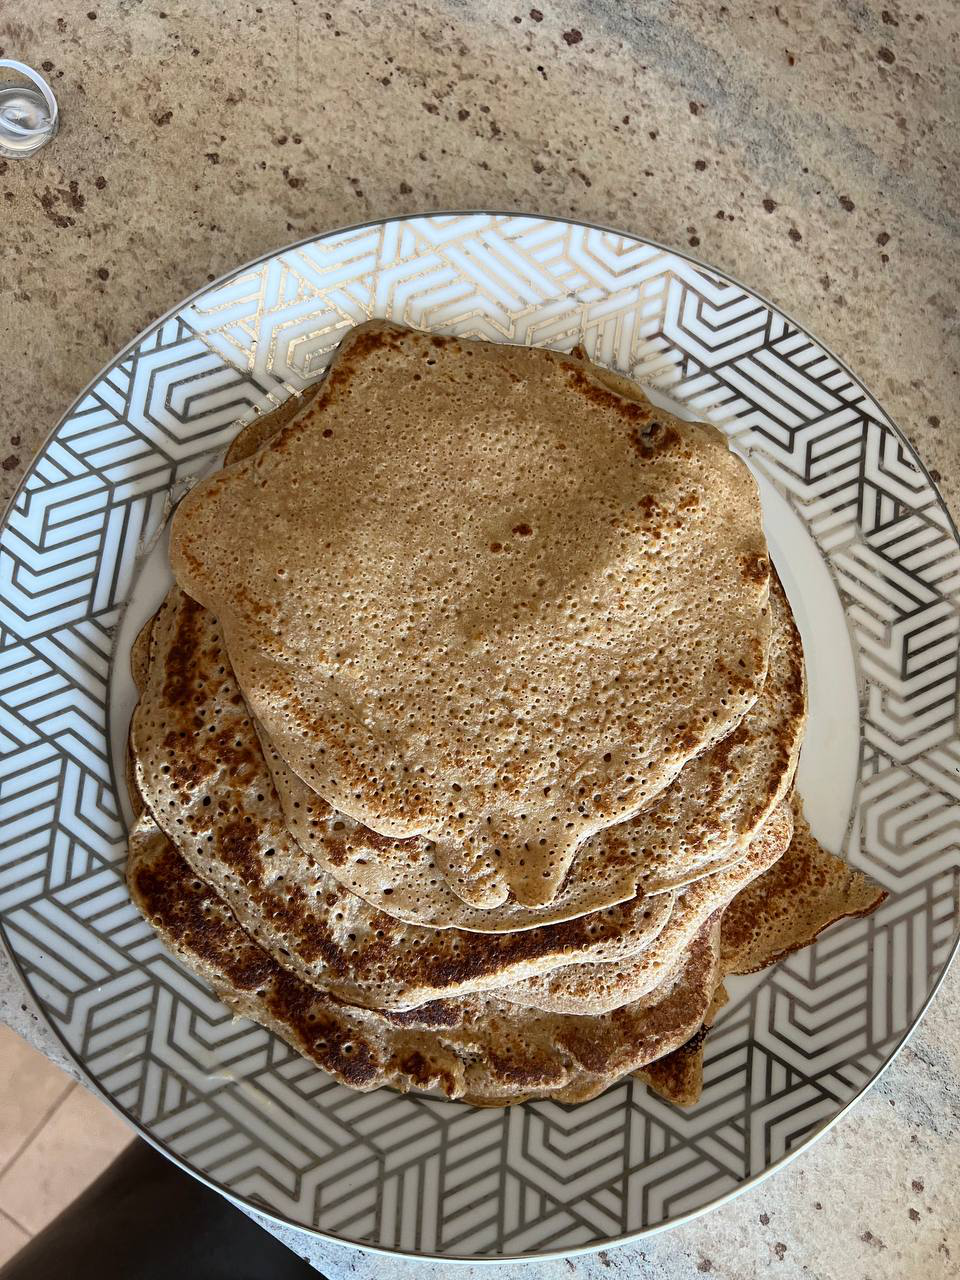

In [10]:
images[0]